In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Given corpus
corpus = {
    "m1":"Supervised learning involves training a model on labeled data to make predictions or classifications.",
    "m2":"Unsupervised learning algorithms aim to find hidden patterns or structures in unlabeled data.",
    "m3":"Reinforcement learning focuses on training agents to make sequences of decisions in an environment to maximize rewards.",
    "m4":"Deep learning, a subset of machine learning, utilizes neural networks with many layers to learn intricate patterns from data.",
    "m5":"Convolutional Neural Networks (CNNs) are commonly used in image recognition tasks due to their ability to capture spatial hierarchies.",
    "m6":"Natural Language Processing (NLP) techniques enable machines to understand, interpret, and generate human language.",
    "m7":"Overfitting occurs when a model learns noise or irrelevant details in the training data, resulting in poor generalization to unseen data.",
    "m8":"Regularization techniques such as L1 and L2 regularization help prevent overfitting by penalizing large parameter values.",
    "m9":"Cross-validation is a method used to assess the generalization performance of a machine learning model by splitting the data into multiple subsets.",
    "m10":"Ensemble learning combines predictions from multiple models to improve overall performance, often using techniques like bagging and boosting.",
    "c1":"Sauteing involves cooking food quickly in a small amount of oil over high heat, often used for vegetables and meats.",
    "c2":"Braising is a cooking method where food is first seared at high heat and then slowly cooked in a liquid at lower heat until tender.",
    "c3":"Baking requires cooking food in an oven using dry heat, often used for bread, cakes, and pastries.",
    "c4":"Blanching involves briefly immersing food in boiling water, then shocking it in ice water to halt the cooking process, commonly used for vegetables.",
    "c5":"Grilling is a cooking technique where food is cooked over direct heat, imparting a characteristic charred flavor.",
    "c6":"Poaching involves gently cooking food in liquid, such as water or broth, at low temperatures until it is tender and cooked through.",
    "c7":"Marinating involves soaking food in a seasoned liquid mixture to enhance flavor and tenderize meats before cooking.",
    "c8":"Roasting is a dry-heat cooking method where food is cooked in an oven, resulting in a caramelized exterior and moist interior.",
    "c9":"Deglazing is the process of adding liquid to a hot pan to loosen browned bits of food stuck to the bottom, creating a flavorful sauce.",
    "c10":"Steaming involves cooking food by exposing it to steam from boiling water, a gentle method that helps retain nutrients and flavors."
}

# Extract document strings from the corpus
documents = list(corpus.values())

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the documents to create the term-document matrix
X = vectorizer.fit_transform(documents)

# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()
document_names = corpus.keys()

# Create a DataFrame from the term-document matrix
td_matrix = pd.DataFrame(X.toarray().T, columns=corpus.keys(), index=terms)

# Display the term-document matrix
td_matrix


,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
ability,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
adding,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
agents,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aim,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
algorithms,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vegetables,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
water,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1
when,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
where,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [2]:
import numpy as np
U, sigma, VT = np.linalg.svd(td_matrix, full_matrices=False)

In [3]:
print(f"U: {U.shape}")
print(f"sigma: {sigma.shape}")
print(f"VT: {VT.shape}")

U: (202, 20)
sigma: (20,)
VT: (20, 20)


Resultant Matrices:
-  $U$: Left singular vectors matrix (term space).
-  $\sum$: Diagonal matrix containing the singular values.
-  $V^T$: Right singular vectors matrix (document space).

Dimensionality Reduction:
To reduce the dimensionality of the data, we typically truncate the matrices $U$, $\sum$, and $V^T$ by keeping only the top $k$ singular values and their corresponding vectors.

In [4]:
# Truncate matrices to reduce dimensionality
k = 2
U_truncated = U[:, :k]
sigma_truncated = np.diag(sigma[:k])
VT_truncated = VT[:k, :]

# Compute the reduced approximation of the original matrix
A_approx = np.dot(U_truncated, np.dot(sigma_truncated, VT_truncated))
A_approx.shape

(202, 20)

In [6]:
U_truncated

array([[-0.01879471,  0.03082764],
       [-0.03459185,  0.05446326],
       [-0.02063834,  0.03888095],
       [-0.01388779,  0.02369177],
       [-0.01388779,  0.02369177],
       [-0.02663289, -0.02015982],
       [-0.079085  , -0.02741151],
       [-0.22793917, -0.16305915],
       [-0.01879471,  0.03082764],
       [-0.03632967, -0.03914813],
       [-0.02382176,  0.04178566],
       [-0.10550893, -0.14993389],
       [-0.01267166,  0.0195517 ],
       [-0.02291199, -0.02396471],
       [-0.02431203, -0.00628407],
       [-0.03459185,  0.05446326],
       [-0.03651416,  0.0015227 ],
       [-0.06003773, -0.00171815],
       [-0.01267166,  0.0195517 ],
       [-0.03459185,  0.05446326],
       [-0.0373652 , -0.05746521],
       [-0.02291199, -0.02396471],
       [-0.03651416,  0.0015227 ],
       [-0.03077853, -0.03500347],
       [-0.03459185,  0.05446326],
       [-0.05289647,  0.03440016],
       [-0.02291199, -0.02396471],
       [-0.01879471,  0.03082764],
       [-0.03553467,

To create a scatter plot of terms using the term-space and documents using the document-space matrices obtained from the Singular Value Decomposition (SVD), we need to visualize the rows of the matrices $U$ and $V^T$, respectively. Each row in these matrices represents a term or document, and the columns represent the reduced dimensions obtained through SVD.

Here's how you can create scatter plots for terms and documents:

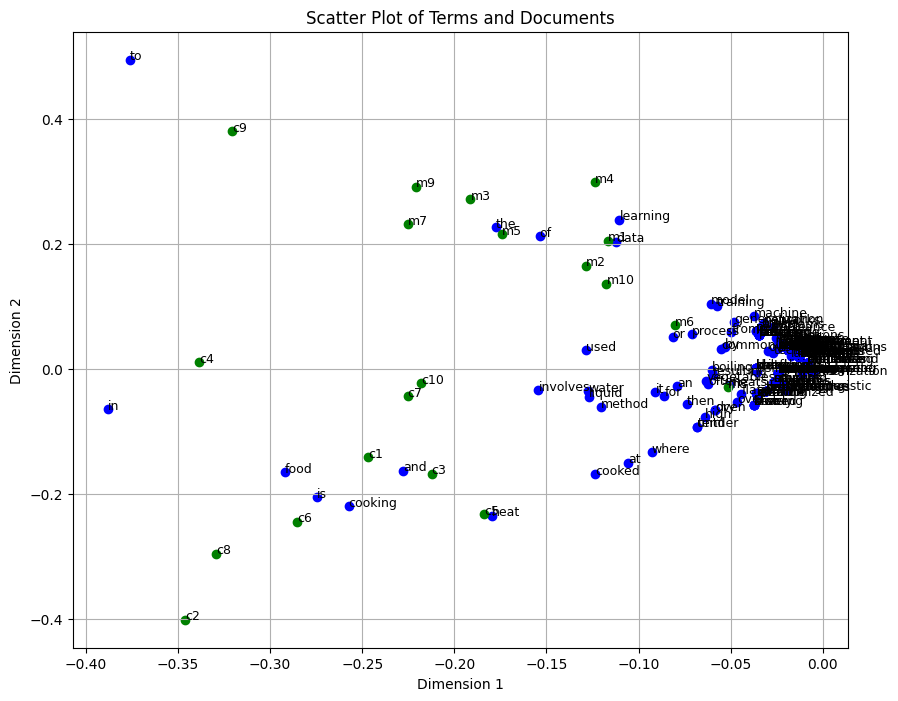

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Scatter plot for terms (using term-space matrix U)
for idx, term in enumerate(terms):
    plt.scatter(U_truncated[idx, 0], U_truncated[idx, 1], marker='o', color='blue')
    plt.text(U_truncated[idx, 0], U_truncated[idx, 1], term, fontsize=9)

# Scatter plot for documents (using document-space matrix V^T)
for i, doc_name in enumerate(document_names):
    plt.scatter(VT_truncated[0, i], VT_truncated[1, i], marker='o', color='green')
    plt.text(VT_truncated[0, i], VT_truncated[1, i], doc_name, fontsize=9)

plt.title('Scatter Plot of Terms and Documents')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()
